In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.neural_network import MLPClassifier

a)

In [2]:
import warnings
warnings.filterwarnings("ignore")

drink=pd.read_csv("data\strongdrink.txt")
drink.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


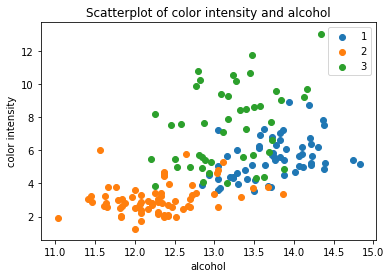

In [3]:
fig, ax = plt.subplots()

for i in [1,2,3]:
    data=drink[drink["cultivar"]==i]
    ax.scatter(data["alco"], data["color_int"],label=i)

ax.legend()
plt.xlabel("alcohol")
plt.ylabel("color intensity")
plt.title("Scatterplot of color intensity and alcohol")
plt.show()

b)

In [4]:
x_variable_names = ['alco', 'malic', 'tot_phen', 'color_int']
y_name = ['cultivar']
Xvars = drink[x_variable_names].values
yvals = drink[y_name].values

In [5]:
clf_mlog = LogisticRegression(solver='newton-cg',multi_class='multinomial').fit(Xvars, yvals)
param_dist1 = {'penalty': ['l1','l2'],'C': sp_uniform(0.1, 10.0)}
random_search1 = RandomizedSearchCV(LogisticRegression().fit(Xvars, yvals), 
                                    param_distributions=param_dist1,
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25,
                                    scoring='neg_mean_squared_error')
random_search1.fit(Xvars,yvals)
print('RandBestEstimator1=', random_search1.best_estimator_)
print('RandBestParams1=', random_search1.best_params_)
print('RandBestScore1=', -random_search1.best_score_)

RandBestEstimator1= LogisticRegression(C=2.665871587495725, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
RandBestParams1= {'C': 2.665871587495725, 'penalty': 'l1'}
RandBestScore1= 0.11931818181818182


c)

In [6]:
rfc = RandomForestClassifier(random_state=25).fit(Xvars, yvals)

In [7]:
param_dist2 = {'n_estimators':sp_randint(10,200),
                'max_depth': sp_randint(2,4),
                'min_samples_split': sp_randint(2, 20),
                'min_samples_leaf': sp_randint(2, 20),
                'max_features': sp_randint(1, 4)}


random_search2 = RandomizedSearchCV(rfc, param_distributions=param_dist2,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

random_search2.fit(Xvars,yvals)
print('RandBestEstimator2=', random_search2.best_estimator_)
print('RandBestParams2=', random_search2.best_params_)
print('RandBestScore2=', -random_search2.best_score_)

RandBestEstimator2= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=13, min_samples_split=18,
            min_weight_fraction_leaf=0.0, n_estimators=176, n_jobs=1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)
RandBestParams2= {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 13, 'min_samples_split': 18, 'n_estimators': 176}
RandBestScore2= 0.13068181818181818


d)

In [13]:
svc= SVC(kernel="rbf", degree=2).fit(Xvars, yvals)

In [16]:
param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0),
               'gamma':["scale","auto"],
               'shrinking':[True,False]}

random_search3 = RandomizedSearchCV(svc, param_distributions=param_dist3,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

random_search3.fit(Xvars,yvals)
print('RandBestEstimator2=', random_search3.best_estimator_)
print('RandBestParams2=', random_search3.best_params_)
print('RandBestScore2=', -random_search3.best_score_)

JoblibTypeError: JoblibTypeError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\runpy.py in _run_code(code=<code object <module> at 0x000001AE6139A8A0, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\i...da\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000001AE6139A8A0, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\i...da\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    494         if self.poller is not None:
    495             self.poller.start()
    496         self.kernel.start()
    497         self.io_loop = ioloop.IOLoop.current()
    498         try:
--> 499             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    500         except KeyboardInterrupt:
    501             pass
    502 
    503 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    127         except (RuntimeError, AssertionError):
    128             old_loop = None
    129         try:
    130             self._setup_logging()
    131             asyncio.set_event_loop(self.asyncio_loop)
--> 132             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    133         finally:
    134             asyncio.set_event_loop(old_loop)
    135 
    136     def stop(self):

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    518         sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    519                                finalizer=self._asyncgen_finalizer_hook)
    520         try:
    521             events._set_running_loop(self)
    522             while True:
--> 523                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    524                 if self._stopping:
    525                     break
    526         finally:
    527             self._stopping = False

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1753                         logger.warning('Executing %s took %.3f seconds',
   1754                                        _format_handle(handle), dt)
   1755                 finally:
   1756                     self._current_handle = None
   1757             else:
-> 1758                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(552, 1)>>
   1759         handle = None  # Needed to break cycles when an exception occurs.
   1760 
   1761     def _set_coroutine_origin_tracking(self, enabled):
   1762         if bool(enabled) == bool(self._coroutine_origin_tracking_enabled):

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(552, 1)>)
     83     def cancelled(self):
     84         return self._cancelled
     85 
     86     def _run(self):
     87         try:
---> 88             self._context.run(self._callback, *self._args)
        self._context.run = <built-in method run of Context object>
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (552, 1)
     89         except Exception as exc:
     90             cb = format_helpers._format_callback_source(
     91                 self._callback, self._args)
     92             msg = f'Exception in callback {cb}'

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=552, events=1)
    117             self.writers.remove(fd)
    118         del self.handlers[fd]
    119 
    120     def _handle_events(self, fd, events):
    121         fileobj, handler_func = self.handlers[fd]
--> 122         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    123 
    124     def start(self):
    125         try:
    126             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0...t('RandBestScore2=', -random_search3.best_score_)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2020, 3, 12, 15, 48, 37, 704008, tzinfo=tzutc()), 'msg_id': 'f1c1e357c956419b891274228b2cb273', 'msg_type': 'execute_request', 'session': 'bf4af259d6654ab7bd7dda21c50668ea', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'f1c1e357c956419b891274228b2cb273', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warning("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'bf4af259d6654ab7bd7dda21c50668ea']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0...t('RandBestScore2=', -random_search3.best_score_)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2020, 3, 12, 15, 48, 37, 704008, tzinfo=tzutc()), 'msg_id': 'f1c1e357c956419b891274228b2cb273', 'msg_type': 'execute_request', 'session': 'bf4af259d6654ab7bd7dda21c50668ea', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'f1c1e357c956419b891274228b2cb273', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'bf4af259d6654ab7bd7dda21c50668ea'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0...t('RandBestScore2=', -random_search3.best_score_)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2020, 3, 12, 15, 48, 37, 704008, tzinfo=tzutc()), 'msg_id': 'f1c1e357c956419b891274228b2cb273', 'msg_type': 'execute_request', 'session': 'bf4af259d6654ab7bd7dda21c50668ea', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'f1c1e357c956419b891274228b2cb273', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0...t('RandBestScore2=', -random_search3.best_score_)", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0...t('RandBestScore2=', -random_search3.best_score_)"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0...t('RandBestScore2=', -random_search3.best_score_)",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0...t('RandBestScore2=', -random_search3.best_score_)",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0...t('RandBestScore2=', -random_search3.best_score_)", store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = "param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0...t('RandBestScore2=', -random_search3.best_score_)"
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0...t('RandBestScore2=', -random_search3.best_score_)", store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-16-c25dd5ab2fda>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1ae67686f28, executio...rue silent=False shell_futures=True> result=None>)
   2896             raise ValueError("Interactivity was %r" % interactivity)
   2897         try:
   2898             for i, node in enumerate(to_run_exec):
   2899                 mod = ast.Module([node])
   2900                 code = compiler(mod, cell_name, "exec")
-> 2901                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000001AE686DDC90, file "<ipython-input-16-c25dd5ab2fda>", line 9>
        result = <ExecutionResult object at 1ae67686f28, executio...rue silent=False shell_futures=True> result=None>
   2902                     return True
   2903 
   2904             for i, node in enumerate(to_run_interactive):
   2905                 mod = ast.Interactive([node])

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000001AE686DDC90, file "<ipython-input-16-c25dd5ab2fda>", line 9>, result=<ExecutionResult object at 1ae67686f28, executio...rue silent=False shell_futures=True> result=None>)
   2956         outflag = True  # happens in more places, so it's easier as default
   2957         try:
   2958             try:
   2959                 self.hooks.pre_run_code_hook()
   2960                 #rprint('Running code', repr(code_obj)) # dbg
-> 2961                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000001AE686DDC90, file "<ipython-input-16-c25dd5ab2fda>", line 9>
        self.user_global_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import pandas as pd\nimport numpy as np\nimport ma...\nfrom sklearn.neural_network import MLPClassifier', 'import warnings\nwarnings.filterwarnings("ignore"...=pd.read_csv("data\\strongdrink.txt")\ndrink.head()', 'fig, ax = plt.subplots()\n\nfor i in [1,2,3]:\n    ...rplot of color intensity and alcohol")\nplt.show()', "x_variable_names = ['alco', 'malic', 'tot_phen',...riable_names].values\nyvals = drink[y_name].values", "clf_mlog = LogisticRegression(solver='newton-cg'...t('RandBestScore1=', -random_search1.best_score_)", 'rfc = RandomForestClassifier(random_state=25).fit(Xvars, yvals)', "param_dist2 = {'n_estimators':sp_randint(10,200)...t('RandBestScore2=', -random_search2.best_score_)", 'svc= SVC(kernel="rbf", degree=2).fit(Xvars, yvals)', "param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0...t('RandBestScore2=', -random_search3.best_score_)", 'svc= SVC(kernel="rbf", degree=2).fit(Xvars, yvals)', "param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0...t('RandBestScore2=', -random_search3.best_score_)", 'svc= SVC(kernel="rbf", degree=2).fit(X, y)', 'svc= SVC(kernel="rbf", degree=2).fit(Xvars, yvals)', "param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0...t('RandBestScore2=', -random_search3.best_score_)", 'import pandas as pd\nimport numpy as np\nimport ma...\nfrom sklearn.neural_network import MLPClassifier', "param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0...t('RandBestScore2=', -random_search3.best_score_)"], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MLPClassifier': <class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>, 'Out': {2:    cultivar   alco  malic   ash   alk  magn  tot...
4     1.82       4.32  1.04      2.93      735  }, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, 'SVC': <class 'sklearn.svm.classes.SVC'>, 'Xvars': array([[14.23    ,  1.71    ,  2.8     ,  5.64  ...   [14.13    ,  4.1     ,  2.05    ,  9.2     ]]), '_':    cultivar   alco  malic   ash   alk  magn  tot...
4     1.82       4.32  1.04      2.93      735  , ...}
        self.user_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import pandas as pd\nimport numpy as np\nimport ma...\nfrom sklearn.neural_network import MLPClassifier', 'import warnings\nwarnings.filterwarnings("ignore"...=pd.read_csv("data\\strongdrink.txt")\ndrink.head()', 'fig, ax = plt.subplots()\n\nfor i in [1,2,3]:\n    ...rplot of color intensity and alcohol")\nplt.show()', "x_variable_names = ['alco', 'malic', 'tot_phen',...riable_names].values\nyvals = drink[y_name].values", "clf_mlog = LogisticRegression(solver='newton-cg'...t('RandBestScore1=', -random_search1.best_score_)", 'rfc = RandomForestClassifier(random_state=25).fit(Xvars, yvals)', "param_dist2 = {'n_estimators':sp_randint(10,200)...t('RandBestScore2=', -random_search2.best_score_)", 'svc= SVC(kernel="rbf", degree=2).fit(Xvars, yvals)', "param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0...t('RandBestScore2=', -random_search3.best_score_)", 'svc= SVC(kernel="rbf", degree=2).fit(Xvars, yvals)', "param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0...t('RandBestScore2=', -random_search3.best_score_)", 'svc= SVC(kernel="rbf", degree=2).fit(X, y)', 'svc= SVC(kernel="rbf", degree=2).fit(Xvars, yvals)', "param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0...t('RandBestScore2=', -random_search3.best_score_)", 'import pandas as pd\nimport numpy as np\nimport ma...\nfrom sklearn.neural_network import MLPClassifier', "param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0...t('RandBestScore2=', -random_search3.best_score_)"], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MLPClassifier': <class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>, 'Out': {2:    cultivar   alco  malic   ash   alk  magn  tot...
4     1.82       4.32  1.04      2.93      735  }, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, 'SVC': <class 'sklearn.svm.classes.SVC'>, 'Xvars': array([[14.23    ,  1.71    ,  2.8     ,  5.64  ...   [14.13    ,  4.1     ,  2.05    ,  9.2     ]]), '_':    cultivar   alco  malic   ash   alk  magn  tot...
4     1.82       4.32  1.04      2.93      735  , ...}
   2962             finally:
   2963                 # Reset our crash handler in place
   2964                 sys.excepthook = old_excepthook
   2965         except SystemExit as e:

...........................................................................
C:\Users\iarak\OneDrive\Desktop\PCE\persp-model-econ_w20\ProblemSets\PS9\<ipython-input-16-c25dd5ab2fda> in <module>()
      4 
      5 random_search3 = RandomizedSearchCV(svc, param_distributions=param_dist3,
      6                        n_iter=200, n_jobs=-1, cv=5, random_state=25,
      7                        scoring='neg_mean_squared_error')
      8 
----> 9 random_search3.fit(Xvars,yvals)
     10 print('RandBestEstimator2=', random_search3.best_estimator_)
     11 print('RandBestParams2=', random_search3.best_params_)
     12 print('RandBestScore2=', -random_search3.best_score_)

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\sklearn\model_selection\_search.py in fit(self=RandomizedSearchCV(cv=5, error_score='raise',
  ...ng='neg_mean_squared_error',
          verbose=0), X=array([[14.23    ,  1.71    ,  2.8     ,  5.64  ...   [14.13    ,  4.1     ,  2.05    ,  9.2     ]]), y=array([[1],
       [1],
       [1],
       [1],
...       [3],
       [3],
       [3]], dtype=int64), groups=None, **fit_params={})
    635                                   return_train_score=self.return_train_score,
    636                                   return_n_test_samples=True,
    637                                   return_times=True, return_parameters=False,
    638                                   error_score=self.error_score)
    639           for parameters, (train, test) in product(candidate_params,
--> 640                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=5, random_state=None, shuffle=False)>
        X = array([[14.23    ,  1.71    ,  2.8     ,  5.64  ...   [14.13    ,  4.1     ,  2.05    ,  9.2     ]])
        y = array([[1],
       [1],
       [1],
       [1],
...       [3],
       [3],
       [3]], dtype=int64)
        groups = None
    641 
    642         # if one choose to see train score, "out" will contain train score info
    643         if self.return_train_score:
    644             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
TypeError                                          Thu Mar 12 10:48:39 2020
PID: 23580       Python 3.7.0: C:\Users\iarak\Anaconda3\Anaconda\python.exe
...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (SVC(C=8.801241366272118, cache_size=200, class_w...one, shrinking=False,
  tol=0.001, verbose=False), array([[14.23    ,  1.71    ,  2.8     ,  5.64  ...   [14.13    ,  4.1     ,  2.05    ,  9.2     ]]), array([[1],
       [1],
       [1],
       [1],
...       [3],
       [3],
       [3]], dtype=int64), {'score': make_scorer(mean_squared_error, greater_is_better=False)}, array([ 12,  13,  14,  15,  16,  17,  18,  19,  ...    167, 168, 169, 170, 171, 172, 173, 174, 175]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...30, 131, 132, 133, 134, 135, 136, 137, 138, 139]), 0, {'C': 8.801241366272118, 'gamma': 'scale', 'shrinking': False}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (SVC(C=8.801241366272118, cache_size=200, class_w...one, shrinking=False,
  tol=0.001, verbose=False), array([[14.23    ,  1.71    ,  2.8     ,  5.64  ...   [14.13    ,  4.1     ,  2.05    ,  9.2     ]]), array([[1],
       [1],
       [1],
       [1],
...       [3],
       [3],
       [3]], dtype=int64), {'score': make_scorer(mean_squared_error, greater_is_better=False)}, array([ 12,  13,  14,  15,  16,  17,  18,  19,  ...    167, 168, 169, 170, 171, 172, 173, 174, 175]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...30, 131, 132, 133, 134, 135, 136, 137, 138, 139]), 0, {'C': 8.801241366272118, 'gamma': 'scale', 'shrinking': False})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=SVC(C=8.801241366272118, cache_size=200, class_w...one, shrinking=False,
  tol=0.001, verbose=False), X=array([[14.23    ,  1.71    ,  2.8     ,  5.64  ...   [14.13    ,  4.1     ,  2.05    ,  9.2     ]]), y=array([[1],
       [1],
       [1],
       [1],
...       [3],
       [3],
       [3]], dtype=int64), scorer={'score': make_scorer(mean_squared_error, greater_is_better=False)}, train=array([ 12,  13,  14,  15,  16,  17,  18,  19,  ...    167, 168, 169, 170, 171, 172, 173, 174, 175]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ...30, 131, 132, 133, 134, 135, 136, 137, 138, 139]), verbose=0, parameters={'C': 8.801241366272118, 'gamma': 'scale', 'shrinking': False}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method BaseLibSVM.fit of SVC(C=8.80124136...ne, shrinking=False,
  tol=0.001, verbose=False)>
        X_train = array([[13.75    ,  1.73    ,  2.6     ,  5.6   ...   [14.13    ,  4.1     ,  2.05    ,  9.2     ]])
        y_train = array([[1],
       [1],
       [1],
       [1],
...       [3],
       [3],
       [3]], dtype=int64)
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\sklearn\svm\base.py in fit(self=SVC(C=8.801241366272118, cache_size=200, class_w...one, shrinking=False,
  tol=0.001, verbose=False), X=array([[13.75    ,  1.73    ,  2.6     ,  5.6   ...   [14.13    ,  4.1     ,  2.05    ,  9.2     ]]), y=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0..., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.]), sample_weight=array([], dtype=float64))
    182         fit = self._sparse_fit if self._sparse else self._dense_fit
    183         if self.verbose:  # pragma: no cover
    184             print('[LibSVM]', end='')
    185 
    186         seed = rnd.randint(np.iinfo('i').max)
--> 187         fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
        fit = <bound method BaseLibSVM._dense_fit of SVC(C=8.8...ne, shrinking=False,
  tol=0.001, verbose=False)>
        X = array([[13.75    ,  1.73    ,  2.6     ,  5.6   ...   [14.13    ,  4.1     ,  2.05    ,  9.2     ]])
        y = array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0..., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.])
        sample_weight = array([], dtype=float64)
        solver_type = 0
        kernel = 'rbf'
        seed = 783076103
    188         # see comment on the other call to np.iinfo in this file
    189 
    190         self.shape_fit_ = X.shape
    191 

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\sklearn\svm\base.py in _dense_fit(self=SVC(C=8.801241366272118, cache_size=200, class_w...one, shrinking=False,
  tol=0.001, verbose=False), X=array([[13.75    ,  1.73    ,  2.6     ,  5.6   ...   [14.13    ,  4.1     ,  2.05    ,  9.2     ]]), y=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0..., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.]), sample_weight=array([], dtype=float64), solver_type=0, kernel='rbf', random_seed=783076103)
    249                 class_weight=self.class_weight_, kernel=kernel, C=self.C,
    250                 nu=self.nu, probability=self.probability, degree=self.degree,
    251                 shrinking=self.shrinking, tol=self.tol,
    252                 cache_size=self.cache_size, coef0=self.coef0,
    253                 gamma=self._gamma, epsilon=self.epsilon,
--> 254                 max_iter=self.max_iter, random_seed=random_seed)
        self.max_iter = -1
        random_seed = 783076103
    255 
    256         self._warn_from_fit_status()
    257 
    258     def _sparse_fit(self, X, y, sample_weight, solver_type, kernel,

...........................................................................
C:\Users\iarak\Anaconda3\Anaconda\lib\site-packages\sklearn\svm\libsvm.cp37-win_amd64.pyd in sklearn.svm.libsvm.fit()

TypeError: must be real number, not str
___________________________________________________________________________

e)

In [19]:
mlp= MLPClassifier(activation='tanh', solver='lbfgs', alpha=0.1).fit(Xvars, yvals)

In [21]:
param_dist4 = {'hidden_layer_sizes':sp_randint(1, 100),
               'activation':["logistic", "relu"],
               'alpha': sp_uniform(0.1, 10.0)}

random_search4 = RandomizedSearchCV(mlp, param_distributions=param_dist4,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

random_search4.fit(Xvars,yvals)
print('RandBestEstimator2=', random_search4.best_estimator_)
print('RandBestParams2=', random_search4.best_params_)
print('RandBestScore2=', -random_search4.best_score_)

RandBestEstimator2= MLPClassifier(activation='relu', alpha=0.7965389843643799, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=91, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
RandBestParams2= {'activation': 'relu', 'alpha': 0.7965389843643799, 'hidden_layer_sizes': 91}
RandBestScore2= 0.08522727272727272


f)

In terms of the MSE value, neural net MSLP is the best with the lowest MSE. 